<a href="https://colab.research.google.com/github/mudassir182005/phase-2-customer-support-chatbot/blob/main/chatbot_datamodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Load dataset
df = pd.read_csv("/content/Training data.csv")

# Split data
X = df['instruction']
y_intent = df['intent']
y_category = df['category']
y_response = df['response']

# Drop rows with missing values in 'intent' column before splitting
df.dropna(subset=['intent'], inplace=True)

# Update X and y variables after dropping NaN values
X = df['instruction']
y_intent = df['intent']
y_category = df['category']
y_response = df['response']

# Train/Test Split
X_train_intent, X_test_intent, y_train_intent, y_test_intent = train_test_split(X, y_intent, test_size=0.2, random_state=42)
X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(X, y_category, test_size=0.2, random_state=42)

# -----------------------------
# 1. Intent Classification
# -----------------------------
intent_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', MultinomialNB())
])
intent_pipeline.fit(X_train_intent, y_train_intent)
intent_preds = intent_pipeline.predict(X_test_intent)

print("=== Intent Classification Report ===")
print(classification_report(y_test_intent, intent_preds))

# -----------------------------
# 2. Category Classification
# -----------------------------
category_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression(max_iter=200))
])
category_pipeline.fit(X_train_cat, y_train_cat)
category_preds = category_pipeline.predict(X_test_cat)

print("=== Category Classification Report ===")
print(classification_report(y_test_cat, category_preds))

# -----------------------------
# 3. Response Generation using TF-IDF + Cosine Similarity
# -----------------------------
# Fit vectorizer on full dataset
vectorizer = TfidfVectorizer()
instruction_tfidf = vectorizer.fit_transform(df['instruction'])
response_texts = df['response'].tolist()

def generate_response(user_input):
    input_vec = vectorizer.transform([user_input])
    similarity_scores = cosine_similarity(input_vec, instruction_tfidf)
    best_match_idx = np.argmax(similarity_scores)
    return response_texts[best_match_idx]

# Example use:
print("\n=== Response Generation Examples ===")
examples = [
    "how can i cancel my order",
    "i want to change my delivery address",
    "please delete my account",
    "what is the refund policy",
    "talk to a human agent"
]
for e in examples:
    print(f"\nInstruction: {e}\nResponse: {generate_response(e)}")

=== Intent Classification Report ===
                          precision    recall  f1-score   support

            cancel_order       0.98      1.00      0.99       194
            change_order       1.00      0.97      0.99       178
 change_shipping_address       0.98      0.99      0.98       197
  check_cancellation_fee       1.00      1.00      1.00       185
           check_invoice       1.00      0.96      0.98       208
   check_payment_methods       1.00      1.00      1.00       202
     check_refund_policy       0.96      1.00      0.98       211
               complaint       1.00      1.00      1.00       212
contact_customer_service       1.00      1.00      1.00       229
     contact_human_agent       1.00      0.98      0.99       213
          create_account       1.00      0.99      0.99       205
          delete_account       0.98      1.00      0.99       192
        delivery_options       0.99      1.00      0.99       203
         delivery_period       0.99   

=== Data Overview ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15999 entries, 0 to 15998
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   flags        15999 non-null  object
 1   instruction  15999 non-null  object
 2   category     15999 non-null  object
 3   intent       15999 non-null  object
 4   response     15999 non-null  object
dtypes: object(5)
memory usage: 625.1+ KB
None

=== First 5 Rows ===
   flags                                        instruction category  \
0      B   question about cancelling order {{Order Number}}    ORDER   
1    BQZ  i have a question about cancelling oorder {{Or...    ORDER   
2   BLQZ    i need help cancelling puchase {{Order Number}}    ORDER   
3     BL         I need to cancel purchase {{Order Number}}    ORDER   
4  BCELN  I cannot afford this order, cancel purchase {{...    ORDER   

         intent                                           response  
0  cancel_or

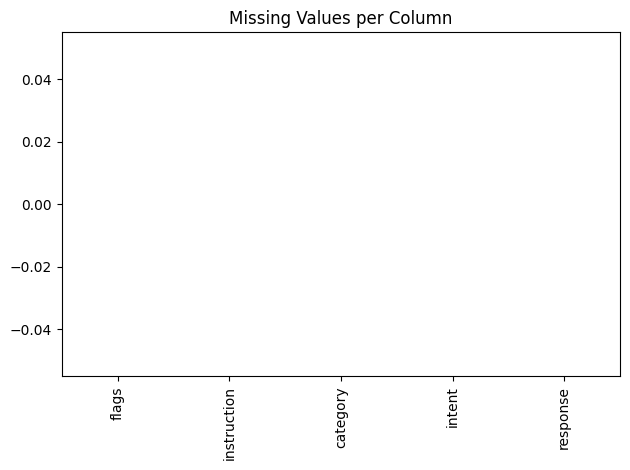

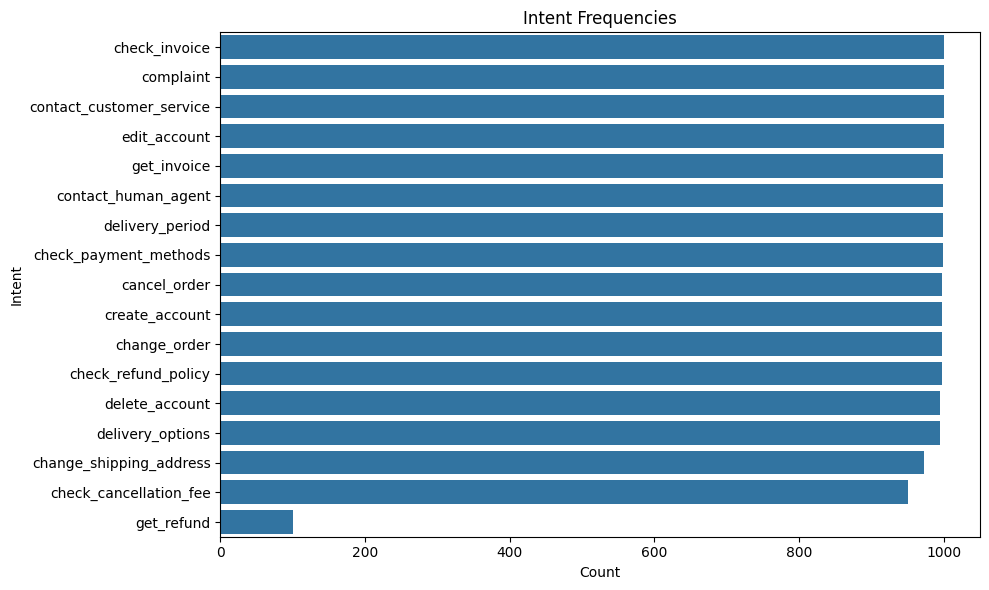

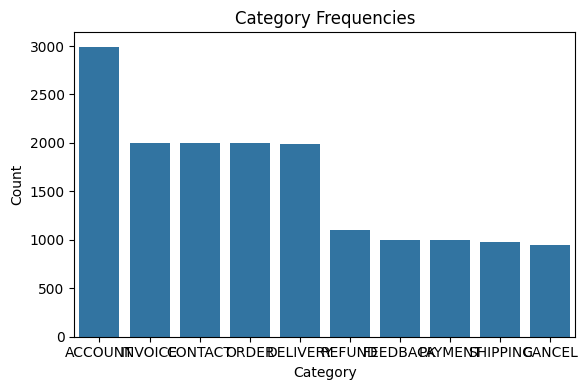


=== Text Feature Statistics ===
       instruction_length  instruction_word_count  response_length  \
count        15999.000000            15999.000000     15999.000000   
mean            46.778674                8.643790       633.797050   
std             10.849247                2.707162       379.957235   
min              8.000000                1.000000        58.000000   
25%             39.000000                7.000000       397.000000   
50%             48.000000                9.000000       519.000000   
75%             55.000000               11.000000       733.500000   
max             91.000000               16.000000      2472.000000   

       response_word_count  
count         15999.000000  
mean            104.630539  
std              60.488505  
min               9.000000  
25%              67.000000  
50%              87.000000  
75%             122.000000  
max             402.000000  


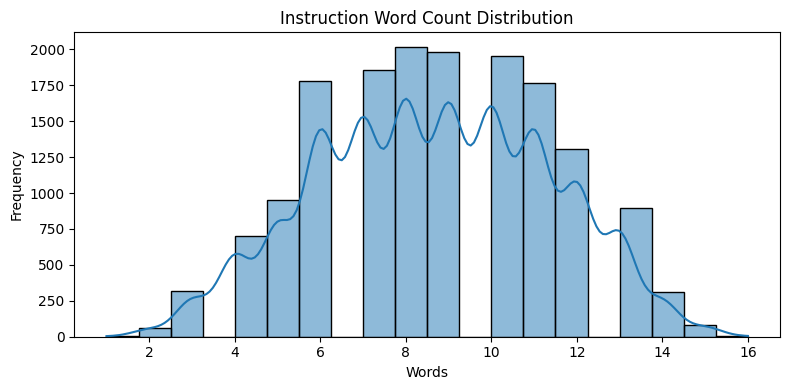

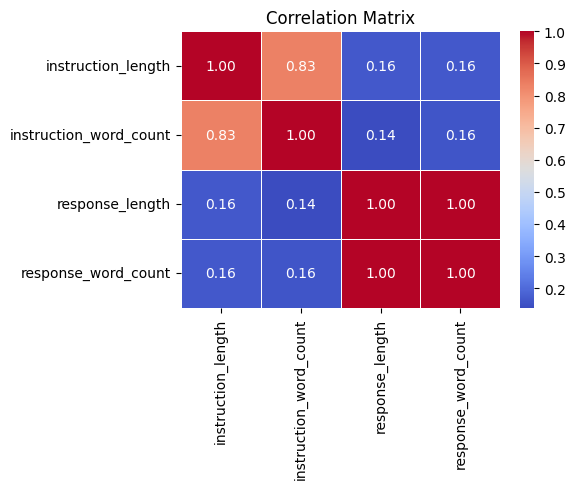


=== Top 20 Words in Instructions ===
      word  count
   account   3876
      help   3641
     order   3174
      need   2420
    number   1984
      want   1811
assistance   1774
     check   1654
      know   1536
  customer   1229
  purchase   1036
    person   1020
  delivery   1008
   payment    987
   address    943
      type    743
   invoice    713
   methods    633
   options    612
  category    604


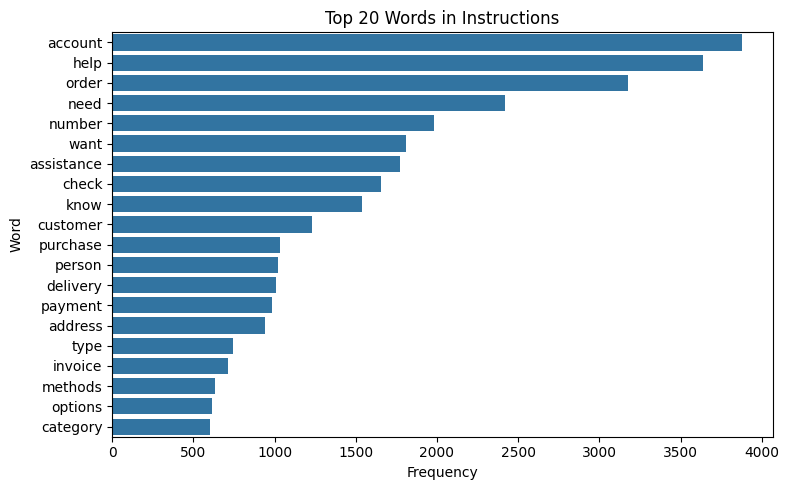

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

# Load the dataset
df = pd.read_csv("Training data.csv")

# === 1. Basic Info ===
print("=== Data Overview ===")
print(df.info())
print("\n=== First 5 Rows ===")
print(df.head())

# === 2. Check Missing Values ===
print("\n=== Missing Values ===")
print(df.isnull().sum())

# Plot missing values
df.isnull().sum().plot(kind='bar', title='Missing Values per Column')
plt.tight_layout()
plt.show()

# === 3. Frequency of Categories and Intents ===
plt.figure(figsize=(10, 6))
sns.countplot(y='intent', data=df, order=df['intent'].value_counts().index)
plt.title("Intent Frequencies")
plt.xlabel("Count")
plt.ylabel("Intent")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x='category', data=df, order=df['category'].value_counts().index)
plt.title("Category Frequencies")
plt.xlabel("Category")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# === 4. Create Text Length Features ===
df['instruction_length'] = df['instruction'].str.len()
df['instruction_word_count'] = df['instruction'].str.split().apply(len)
df['response_length'] = df['response'].str.len()
df['response_word_count'] = df['response'].str.split().apply(len)

# === 5. Descriptive Stats of Text Features ===
print("\n=== Text Feature Statistics ===")
print(df[['instruction_length', 'instruction_word_count', 'response_length', 'response_word_count']].describe())

# Plot distribution of instruction word count
plt.figure(figsize=(8, 4))
sns.histplot(df['instruction_word_count'], bins=20, kde=True)
plt.title("Instruction Word Count Distribution")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# === 6. Correlation Matrix ===
numeric_cols = ['instruction_length', 'instruction_word_count', 'response_length', 'response_word_count']
corr = df[numeric_cols].corr()
plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

# === 7. Word Frequency in Instructions ===
vectorizer = CountVectorizer(stop_words='english', max_features=20)
X = vectorizer.fit_transform(df['instruction'])
word_counts = X.toarray().sum(axis=0)
top_words = pd.DataFrame({
    'word': vectorizer.get_feature_names_out(),
    'count': word_counts
}).sort_values(by='count', ascending=False)

print("\n=== Top 20 Words in Instructions ===")
print(top_words.to_string(index=False))

# Plot top words
plt.figure(figsize=(8, 5))
sns.barplot(y='word', x='count', data=top_words)
plt.title("Top 20 Words in Instructions")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.tight_layout()
plt.show()


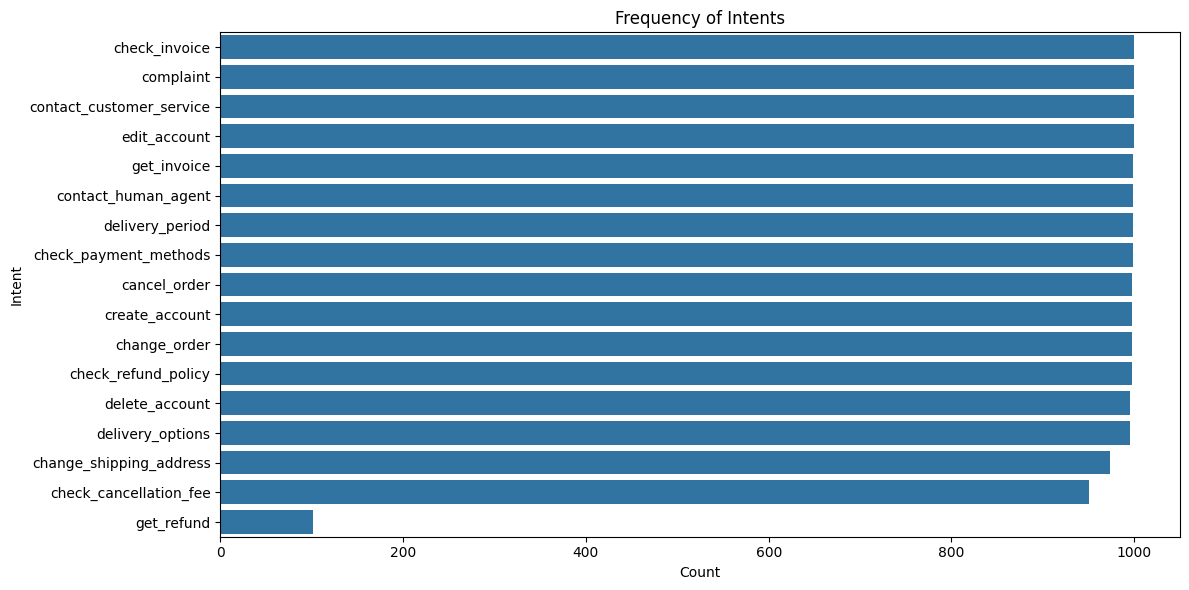

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv("/content/Training data.csv")

# Count of each intent
plt.figure(figsize=(12, 6))
sns.countplot(y='intent', data=df, order=df['intent'].value_counts().index)
plt.title("Frequency of Intents")
plt.xlabel("Count")
plt.ylabel("Intent")
plt.tight_layout()
plt.show()


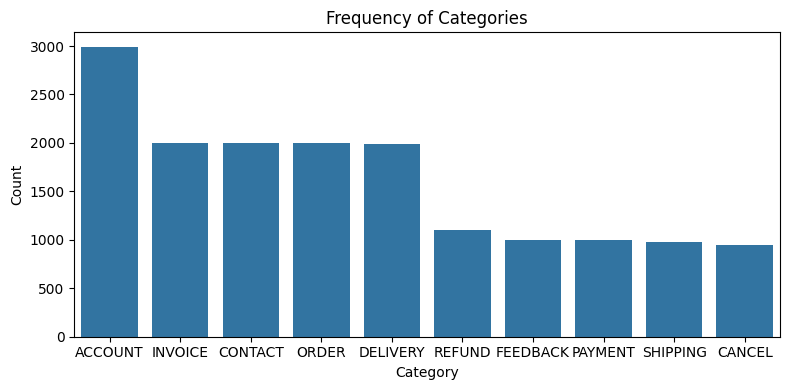

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(x='category', data=df, order=df['category'].value_counts().index)
plt.title("Frequency of Categories")
plt.xlabel("Category")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


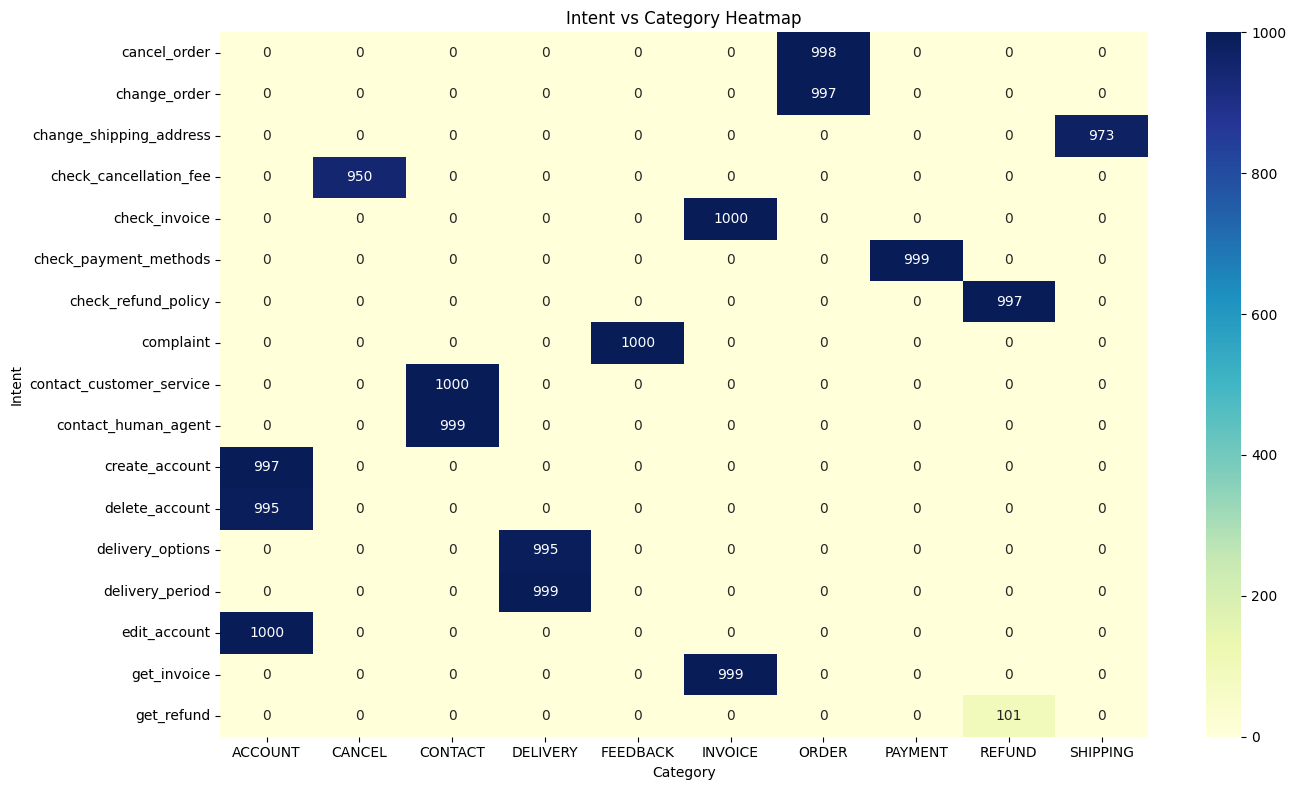

In [ ]:
cross_tab = pd.crosstab(df['intent'], df['category'])
plt.figure(figsize=(14, 8))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Intent vs Category Heatmap")
plt.xlabel("Category")
plt.ylabel("Intent")
plt.tight_layout()
plt.show()


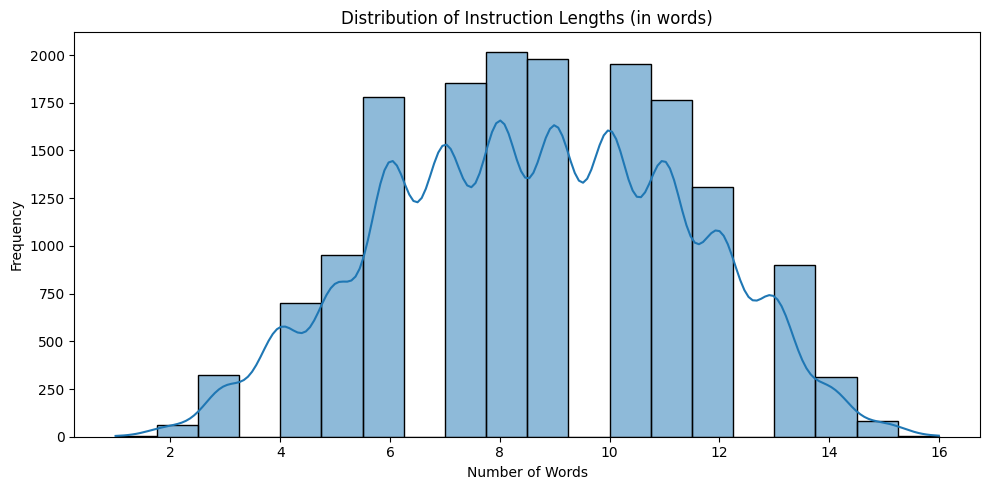

In [ ]:
df['instruction_length'] = df['instruction'].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(10, 5))
sns.histplot(df['instruction_length'], bins=20, kde=True)
plt.title("Distribution of Instruction Lengths (in words)")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


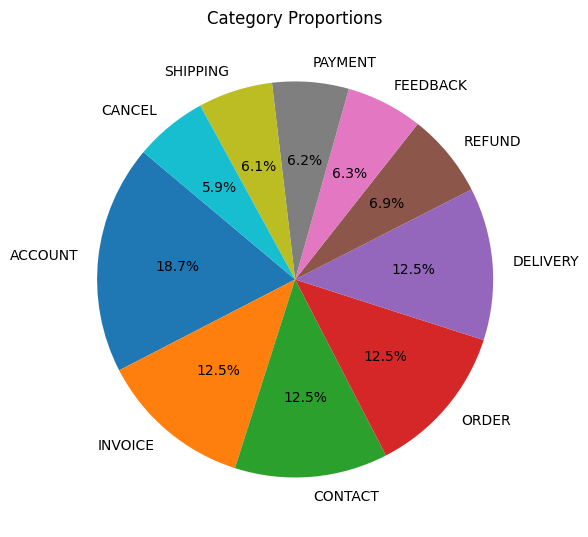

In [ ]:
category_counts = df['category'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Category Proportions")
plt.tight_layout()
plt.show()


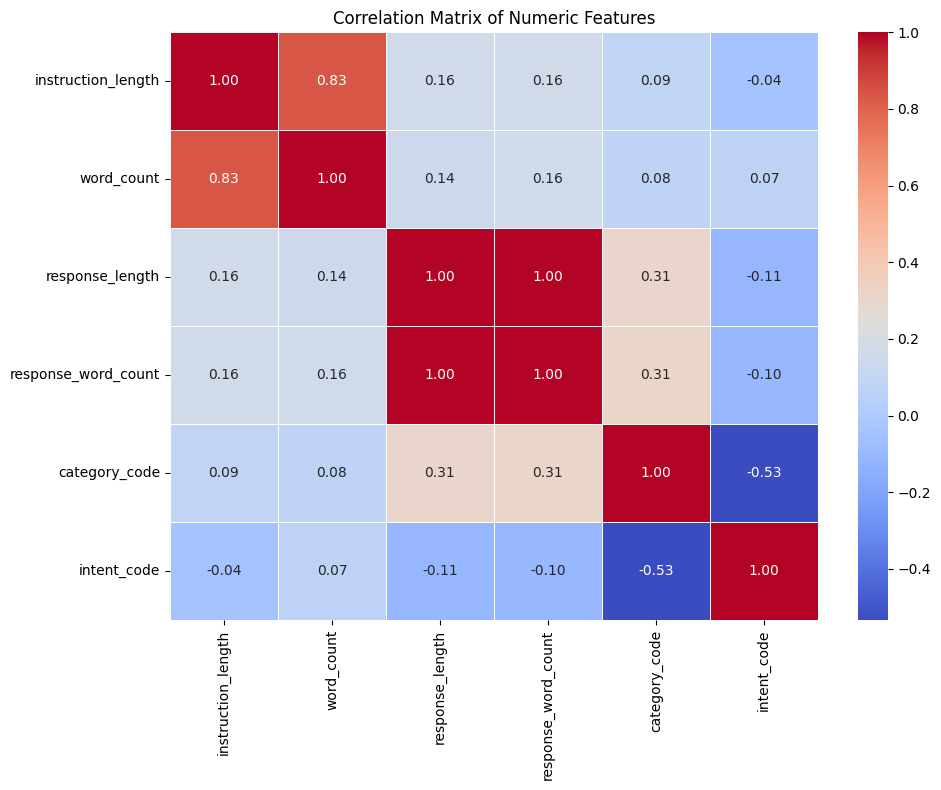

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Training data.csv")

# Create numerical features
df['instruction_length'] = df['instruction'].apply(lambda x: len(str(x)))
df['word_count'] = df['instruction'].apply(lambda x: len(str(x).split()))
df['response_length'] = df['response'].apply(lambda x: len(str(x)))
df['response_word_count'] = df['response'].apply(lambda x: len(str(x).split()))

# Convert category and intent into codes (optional)
df['category_code'] = df['category'].astype('category').cat.codes
df['intent_code'] = df['intent'].astype('category').cat.codes

# Select numeric features
numeric_df = df[['instruction_length', 'word_count', 'response_length', 'response_word_count', 'category_code', 'intent_code']]

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numeric Features")
plt.tight_layout()
plt.show()


=== Classification Report ===
                          precision    recall  f1-score   support

            cancel_order       1.00      1.00      1.00       194
            change_order       1.00      0.99      1.00       178
 change_shipping_address       1.00      0.98      0.99       197
  check_cancellation_fee       0.99      1.00      1.00       185
           check_invoice       0.98      1.00      0.99       208
   check_payment_methods       1.00      1.00      1.00       202
     check_refund_policy       0.99      1.00      1.00       211
               complaint       1.00      1.00      1.00       212
contact_customer_service       1.00      1.00      1.00       229
     contact_human_agent       0.99      1.00      1.00       213
          create_account       1.00      0.99      1.00       205
          delete_account       0.99      1.00      0.99       192
        delivery_options       1.00      1.00      1.00       203
         delivery_period       0.99      1.00

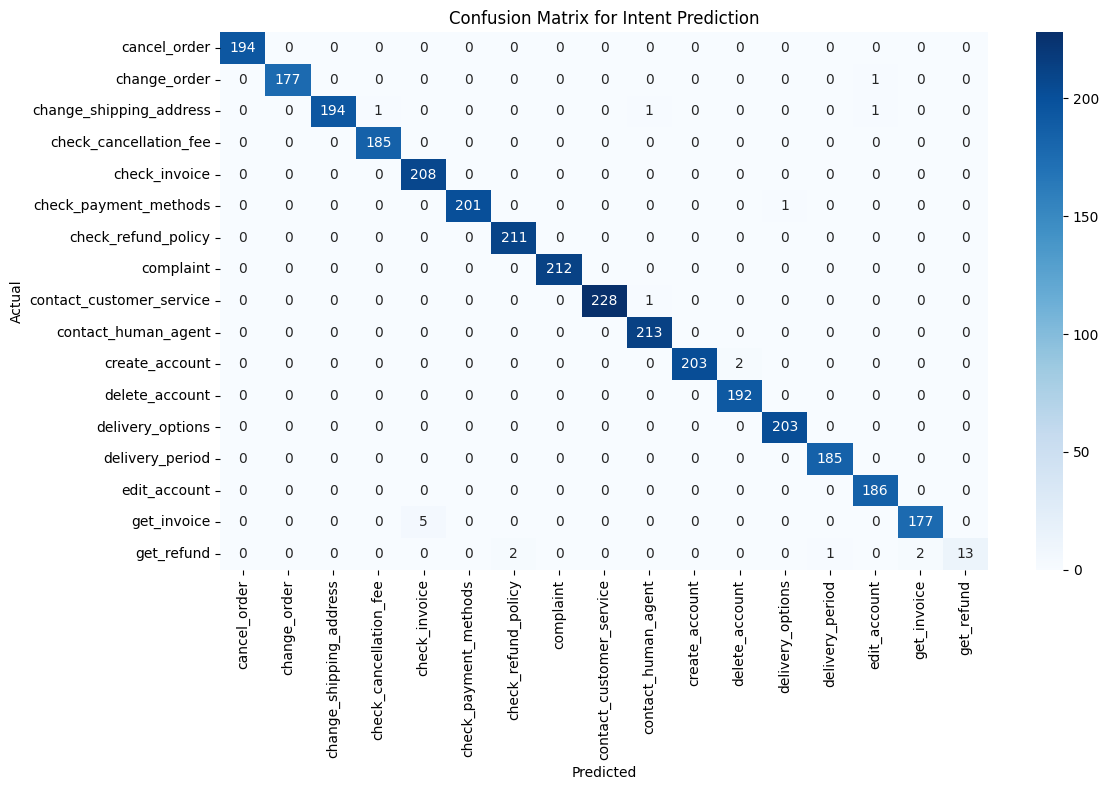

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("/content/Training data.csv")

# Choose target: 'intent' or 'category'
target_column = 'intent'  # Change to 'category' if needed

# Features and labels
X = df['instruction']
y = df[target_column]

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Logistic Regression Model
model = LogisticRegression(max_iter=200)
model.fit(X_train_vec, y_train)

# Predictions
y_pred = model.predict(X_test_vec)

# === Classification Report ===
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))

# === Confusion Matrix ===
conf_matrix = confusion_matrix(y_test, y_pred, labels=model.classes_)

# Plot Confusion Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_,
            yticklabels=model.classes_)
plt.title(f"Confusion Matrix for {target_column.capitalize()} Prediction")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


=== Classification Report ===
                          precision    recall  f1-score   support

            cancel_order       0.99      1.00      1.00       194
            change_order       0.99      0.99      0.99       178
 change_shipping_address       1.00      0.98      0.99       197
  check_cancellation_fee       0.99      1.00      0.99       185
           check_invoice       0.97      0.96      0.97       208
   check_payment_methods       1.00      1.00      1.00       202
     check_refund_policy       0.99      1.00      1.00       211
               complaint       1.00      1.00      1.00       212
contact_customer_service       1.00      1.00      1.00       229
     contact_human_agent       0.99      1.00      1.00       213
          create_account       1.00      1.00      1.00       205
          delete_account       0.98      0.99      0.99       192
        delivery_options       1.00      1.00      1.00       203
         delivery_period       0.99      1.00

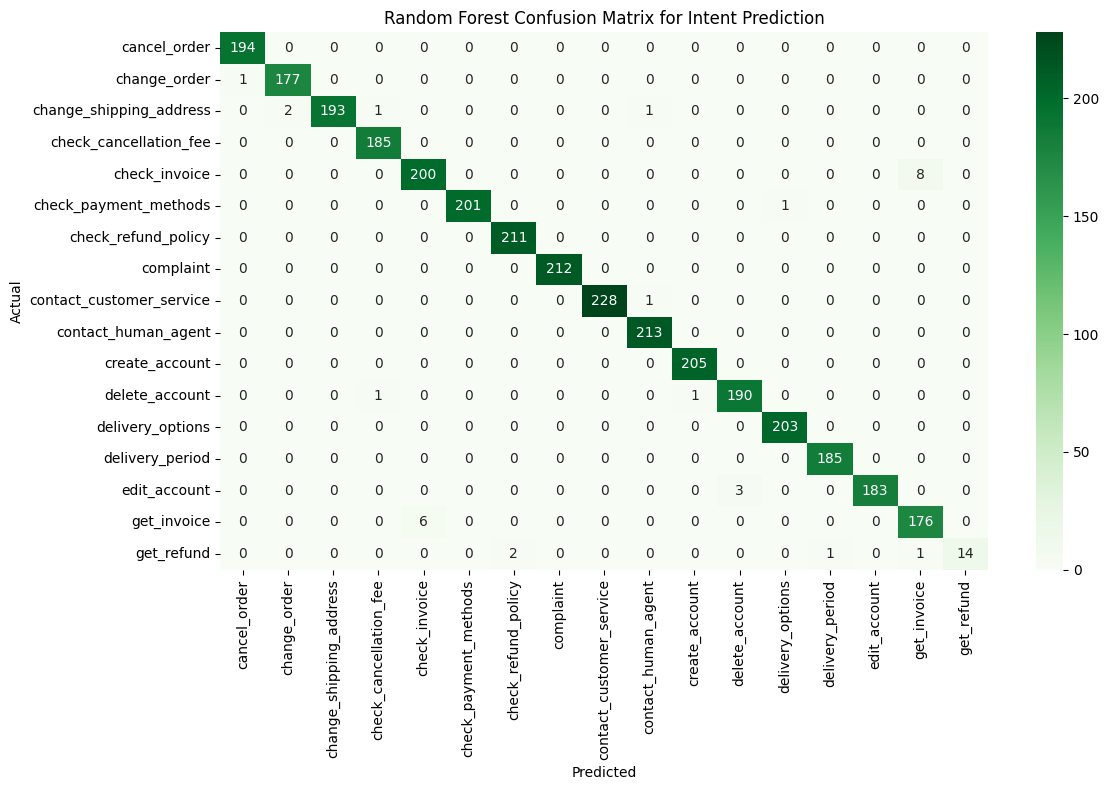

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/content/Training data.csv")

# Choose target variable ('intent' or 'category')
target_column = 'intent'  # Change to 'category' if needed

# Features and target
X = df['instruction']
y = df[target_column]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF vectorization
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_vec, y_train)

# Predictions
y_pred = rf_model.predict(X_test_vec)

# === Classification Report ===
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))

# === Confusion Matrix ===
conf_matrix = confusion_matrix(y_test, y_pred, labels=rf_model.classes_)

# Plot Confusion Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens',
            xticklabels=rf_model.classes_,
            yticklabels=rf_model.classes_)
plt.title(f"Random Forest Confusion Matrix for {target_column.capitalize()} Prediction")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


In [ ]:
pip install gradio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 109.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.2 MB/s eta 0:00:00
